In [1]:
import math
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Problem 1

1) Is this dataset linearly separable ? Can a linear classifer be trained using features $x_{1}$ and $x_{2}$ to classify this data set ? You can plot the dataset points and argue.

### Answer

An easy way to determine the linear seperability of sets of data points is by creating their convex hulls. This tool uses computational geometry to create outer boundaries of the data points which can be used to see seperability. If the intersection of the convex envelope is null for both the data points, they are linearly seperable. If not null, they cannot be seperated.

In [19]:
from scipy.spatial import ConvexHull
from matplotlib.pyplot import figure

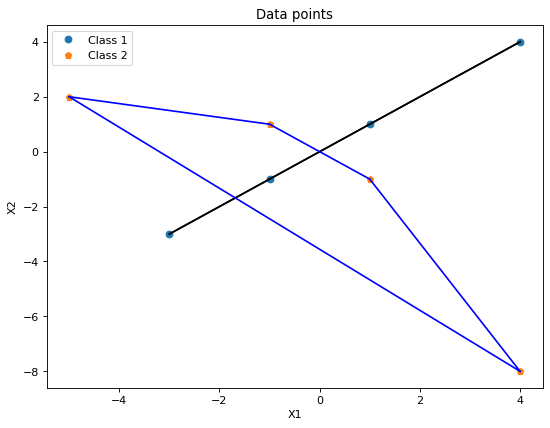

In [474]:
x1 = np.array([[-1,-1],[1,1],[-3,-3],[4,4]])
x2 = np.array([[-1,1],[1,-1],[-5,2],[4,-8]])

figure(figsize=(8, 6), dpi=80)

hull_x=hull = ConvexHull(x,qhull_options='QJ')
plt.plot(x1[:,0], x1[:,1], 'o', label='Class 1')
for simplex in hull_x.simplices:
    plt.plot(x1[simplex, 0], x1[simplex, 1], 'k-')
hull_y = ConvexHull(y,qhull_options='QJ')
plt.plot(x2[:,0], x2[:,1], 'p', label='Class 2')
for simplex in hull_y.simplices:
    plt.plot(x2[simplex, 0], x2[simplex, 1], 'b-')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data points')
plt.show()

Clearly there is an intersection of the Convex hull envelopes which means the data is not linearly seperable

2) Can you define a new 1-dimensional representation  in terms of $x_{1}$ and $x_{2}$ such that the dataset is linearly separable in terms of 1-dimensional representation corresponding to $z$?

### Answer

Let $z$ be given as the multiplication of both axis values of each set of data points 

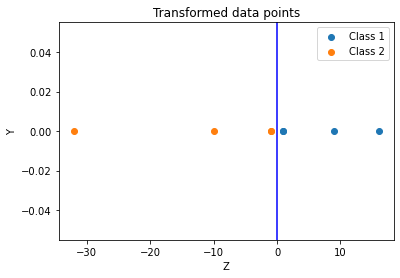

In [475]:
def transform(a):
    f=[]
    for x,y in zip(a[:,0],a[:,1]):
        f.append(x*y)
    return np.array(f)
z_x=transform(x)
z_y=transform(y)
plt.scatter(z_x,np.array([0,0,0,0]),label='Class 1')
plt.scatter(z_y,np.array([0,0,0,0]),label='Class 2')
plt.legend()
plt.xlabel('Z')
plt.ylabel('Y')
plt.title('Transformed data points')
plt.axvline(x = 0,color='b')
plt.show()

The dataset is now clearly linearly seperable using the y axis or $Z=0$

3) What does the separating hyperplane look like ?

### Answer

The line in blue in the above plot shows how to seperate the data points. Alternatively, you can also state that the 
point (0,0) is a seperating hyperplane.

4) Explain the importance of nonlinear transformations in classification problems.

### Answer

In order to clearly seperate the data for appropriate classification, it is often necassary to transform the data when the points seem to overlap. In this problem for example, we saw that on first glance x and y are not linearly seperable. No hyperplane could have clearly divided the two classes. Upon transformation we were able to find a clear and simple hyperplane which enabled correct classification

## Problem 2

1) Derive the bias-variance decomposition for a regression problem, i.e., prove that the expected mean squared error of a regression problem can be written as

$E[MSE] = Bias^2 + Variance + Noise$

### Answer

We know that: <br>

$y=f(x)+\epsilon $ <br>

$MSE = \mathbb{E}[(y-\hat{f}(x))^2]$

$bias[\hat{f}(x)]=\mathbb{E}[\hat{f}(x)]-f(x)$

$var(\hat{f}(x)) = \mathbb{E}[(\hat{f}(x)-\mathbb{E}[\hat{f}(x)]^2]$ <br>

Now: <br>

$MSE = \mathbb{E}[(y-\hat{f}(x))^2] = \mathbb{E}[(f(x)+\epsilon -\hat{f}(x))^2]$

$=\mathbb{E}[(f(x)-\hat{f}(x))^2]+\mathbb{E}[\epsilon^2]+2\mathbb{E}[(f(x)-\hat{f}(x))\epsilon]$

$=\mathbb{E}[(f(x)-\hat{f}(x))^2] + \sigma^2_\epsilon, \text{(because $\mathbb{E}[\epsilon]=0$)}$

Let's examine the first term now:

$\mathbb{E}[(f(x)-\hat{f}(x))^2]=\mathbb{E}[((f(x)-\mathbb{E}[\hat{f}(x)])-(\hat{f}(x)-\mathbb{E}[\hat{f}(x)]))^2]$

$=\mathbb{E}[\mathbb{E}[(\hat{f}(x)-f(x))^2]+\mathbb{E}[(\hat{f}(x)-\mathbb{E}[\hat{f}(x)])^2]-2\mathbb{E}[(f(x)-\mathbb{E}\hat{f}(x)])(\hat{f}(x)-\mathbb{E}[\hat{f}(x)])^2]$

$=\mathbb{E}[(\hat{f}(x)]-f(x))^2+variance-2\mathbb{E}[(f(x)-\mathbb{E}\hat{f}(x)])(\hat{f}(x)-\mathbb{E}[\hat{f}(x)])^2]$

$=bias^2+variance-2[(f(x)-\mathbb{E}\hat{f}(x)])(\mathbb{E}[\hat{f}(x)]-\mathbb{E}[\hat{f}(x)])^2]$

$=bias^2+variance$

Finally we get:

$MSE = bias^2+variance + \sigma^2_\epsilon$

2) Consider the case when $y(x) = x + sin(1.5x) + N(0,0.3)$, where $N(0,0.3)$ is normal distribution with
mean 0 and variance 0.3. Here $f(x) = x + sin(1.5x)$ and $ε = N(0,0.3)$. Create a dataset of size 20
points by randomly generating samples from y. Display the dataset and f(x). Use scatter plot for y
and smooth line plot for f(x).

### Answer

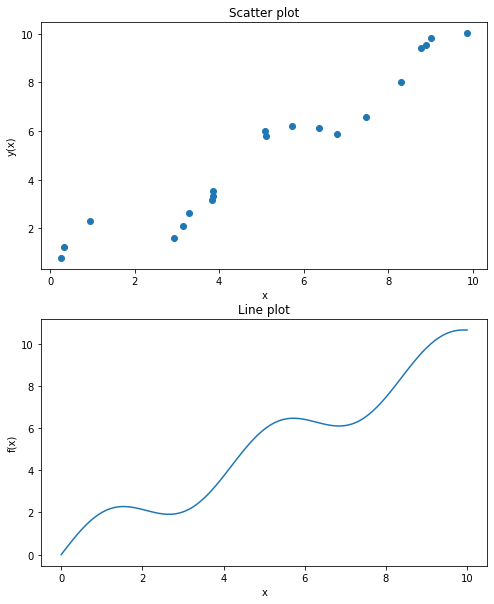

In [479]:
x= 10*np.random.random(20) #Generate 20 random data points from the range [0,10]
x = np.sort(x)
x_smooth = np.linspace(0,10,100)  # 100 data points between 0 and 10 for smooth line plot
f_x = x_smooth + np.sin(1.5*x_smooth) #f(x)
f_y= x+np.sin(1.5*x)+np.random.normal(0,0.3,20) #f(y)


fig = plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.scatter(x,f_y) 
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y(x)')

plt.subplot(2,1,2)
plt.plot(x_smooth,f_x)
plt.title('Line plot')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### Answer

3) Use weighted sum of polynomials as an estimator function for f(x), in particular, let the form of
estimator function be:

$g_{n}(x) = β_{0} + β_{1}x + β_{2}x^2 + ..... + β_{n}x^n$

Consider three candidate estimators, g1,g3, and g10. Estimate the coefficients of each of the three
estimators using the sampled dataset and plot $y(x),f(x),g_{1}(x),g_{3}(x),g_{10}(x)$. Which estimator is underfitting ? Which one is overfitting ? 

Coefficients of degree 1 are [0.99672671 0.03651013]
Coefficients of degree 3 are  [-0.0094017   0.18335334  0.01630476  1.17237849]
Coefficients of degree 10 are [-9.08466123e-06  4.80207549e-04 -1.08870094e-02  1.38318035e-01
 -1.08193372e+00  5.40832425e+00 -1.74334940e+01  3.57006211e+01
 -4.36191829e+01  2.70323356e+01 -3.91985909e+00]


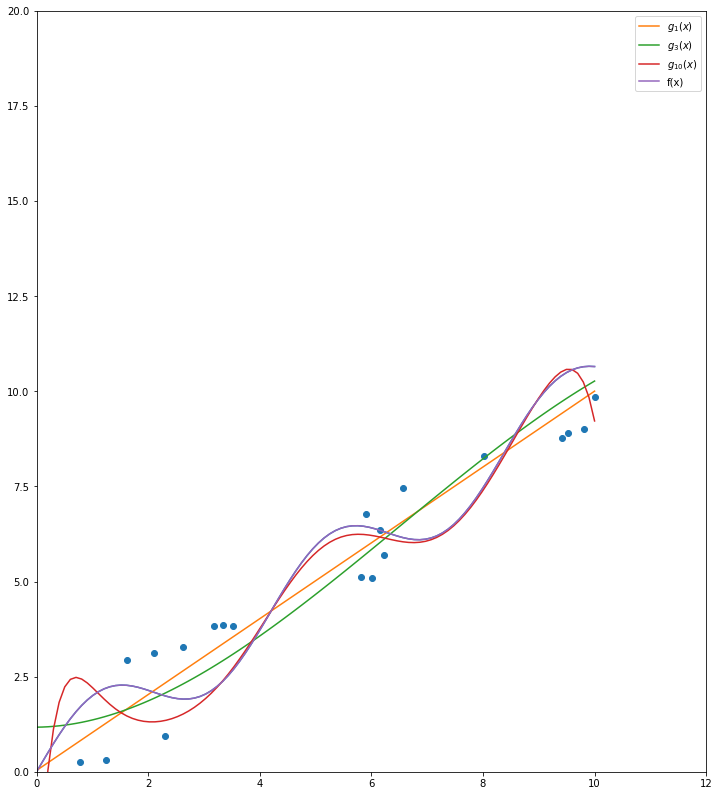

In [480]:
p1 = np.polyfit(x,f_y,1)
p3 = np.polyfit(x,f_y,3)
p10 = np.polyfit(x,f_y,10)

xl = x_smooth
d1 = np.array([xl**1,xl**0])
d3 = np.array([xl**3,xl**2,xl**1,xl**0])
d10 = np.array([xl**10,xl**9,xl**8,xl**7,xl**6,xl**5,xl**4,xl**3,xl**2,xl**1,xl**0])

fig = plt.figure(figsize=(12,14))
plt.plot(x_smooth,f_x)
plt.scatter(f_y,x) 
plt.plot(xl,np.dot(p1,d1),label='$g_1(x)$')
plt.plot(xl,np.dot(p3,d3),label='$g_3(x)$')
plt.plot(xl,np.dot(p10,d10),label='$g_{10}(x)$')
plt.plot(x_smooth,f_x,label='f(x)')
plt.grid()
plt.legend()
plt.ylim(0,20)
plt.xlim(0,12)
plt.legend()
plt.grid()

#Coefficients from highest power to lowest
print('Coefficients of degree 1 are',p1)
print('Coefficients of degree 3 are ',p3)
print('Coefficients of degree 10 are',p10)

Models $g_1(x)$ and $g_3(x)$ seem to underfit the data. Although the model using the ten degree polynomial seems a good fit, it might be overfitting the data a little and the ideal degree lies below 10.

4) Generate 100 datasets (each of size 50) by randomly sampling from y. Partition each dataset into
training and test set (80/20 split). Next fit the estimators of varying complexity, i.e., $g_{1},g_{2},....g_{15}$ using
the training set for each dataset. Then calculate and display the squared bias, variance, and error
on testing set for each of the estimators showing the tradeoff between bias and variance with model
complexity. Can you identify the best model ? 

### Answer

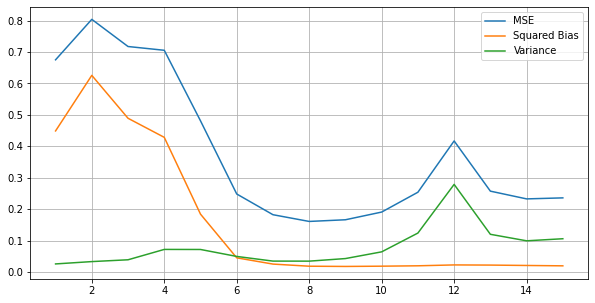

In [487]:
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.evaluate import bias_variance_decomp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

dataset=[]
x = 10*np.random.random(50)
x=np.sort(x)

for i in range(0,100):
    f_y= x+np.sin(1.5*x)+np.random.normal(0,0.3,50) 
    dataset.append(f_y)
    
dataset=np.array(dataset)
### Answer
x = x.reshape(-1,1)

mse=[]
var=[]
bias=[]
for data in dataset:
    X_train, X_test, y_train, y_test = train_test_split(x, data, test_size=0.20,random_state=0)
    m=[]
    b=[]
    v=[]
    for degree in range(1,16):
        polynomial_features= PolynomialFeatures(degree=degree)
        x_poly = polynomial_features.fit_transform(X_train)
        x_poly_test = polynomial_features.fit_transform(X_test)
        model = LinearRegression()
        model.fit(x_poly, y_train)
        mse_m, bias_m, var_m = bias_variance_decomp(model, x_poly, y_train, x_poly_test, y_test, 
                                              loss='mse', num_rounds=50, random_seed=42)
        m.append(mse_m)
        b.append(bias_m**2)
        v.append(var_m)
    mse.append(m)
    var.append(v)
    bias.append(b)
avg_mse = np.mean(np.array(mse), axis=0)
avg_bias = np.mean(np.array(bias), axis=0)
avg_var = np.mean(np.array(var), axis=0)    
complexity = range(1,16)
fig = plt.figure(figsize=(10,5))
plt.plot(complexity,avg_mse,label='MSE')
plt.plot(complexity,avg_bias,label='Squared Bias')
plt.plot(complexity,avg_var, label='Variance')
plt.grid()
plt.legend()
plt.show()

We observe the lowest MSE for the degree 8 polynomial. It can be considered the best model

5) One way to increase model bias is by using regularization. Lets take the order 10 polynomial and apply $L_{2}$ 
 regularization. Compare the bias, variance, and MSE of the regularized model with the unregularized order 10 polynomial model ? Does the regularized model have a higher or lower bias ? What about MSE ? Explain.

### Answer

In [499]:
x = 10*np.random.random(50)
x= np.sort(x)
x = x.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x, dataset[0], test_size=0.20,random_state=0)

polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(X_train)        
x_poly_test = polynomial_features.fit_transform(X_test)
model = LinearRegression()
model.fit(x_poly, y_train)
mse_m, bias_m, var_m = bias_variance_decomp(model, x_poly, y_train, x_poly_test, y_test, 
                                              loss='mse', num_rounds=200, random_seed=42)

print('MSE of unregularized model: ', mse_m)
print('Bias of unregularized model: ', bias_m)
print('Variance of unregularized model: ', var_m)


MSE of unregularized model:  4.706057456535442
Bias of unregularized model:  0.2577409022074006
Variance of unregularized model:  4.44831655432804


In [493]:
#hp={}
#for alpha in np.linspace(0,2,10):   
#    clf = Ridge(alpha=alpha)
#    clf.fit(x_poly,y_train)
#    mse, bias, var = bias_variance_decomp(clf, x_poly, y_train, x_poly_test, y_test, 
                                              #loss='mse', num_rounds=200, random_seed=42)
#    hp[alpha]=mse
chosen_alpha=2
clf = Ridge(chosen_alpha)
clf.fit(x_poly,y_train)
mse, bias, var = bias_variance_decomp(clf, x_poly, y_train, x_poly_test, y_test, 
                                              loss='mse', num_rounds=200, random_seed=42)
print('MSE of regularized model: ', mse)
print('Bias of regularized model: ', bias)
print('Variance of regularized model: ', var)

MSE of regularized model:  0.5195688334028793
Bias of regularized model:  0.47995766712148
Variance of regularized model:  0.03961116628139816


We can see that after regularization, the MSE, Variance fell drastically but bias increased. Overfitting was clearly prevented by incorporating L2 regularization for a 10 degree polynomial model. It helps in generalizing the model better and reducing variance

## Problem 3

1) Summarize the attributes of each dataset: number of features, number of instances, number of classes,
number of numerical features, number of categorical features.

### Answer

I have picked the datasets- Vehicle detection and Speed Dating

Vehicle detection- It involves the prediction of the class of the vehicle when characteristics of it's silouette are provided. There are 4 target classes. The dataset had 846 observations and 18 features. All 18 features are numerical features. There are no categorical features.

https://www.openml.org/d/54

Speed Dating - It involves predicting if someone is likely to meet the person they met during speeddating again. 62 categorical features and 60 numerical features exist. The dataset has 8378 rows as well. There are 2 target classes.

https://www.openml.org/d/40536

In [255]:
df1=pd.read_csv('/Users/sarthakbhargava/Downloads/vehicle.csv')

In [268]:
df1.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [313]:
df2=pd.read_csv('/Users/sarthakbhargava/Downloads/speeddating.csv',na_values='?')

In [314]:
df2.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21.0,27.0,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0
1,0,1,female,21.0,22.0,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0
2,1,1,female,21.0,22.0,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0,1,1,1
3,0,1,female,21.0,23.0,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,1,1
4,0,1,female,21.0,24.0,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,[0-3],[3-5],6.0,6.0,[6-8],[5-6],0.0,1,1,1


2) For each dataset, select 80% of data as training set and remaining 20% as test set. Generate 10 different
subsets of the training set by randomly subsampling 10%,20%,...,100% of the training set. Use each
of these subsets to train two different classifiers: Random forest and Gradient boosting. When training
a classifier also measure the wall clock time to train. After each training, evaluate the accuracy of
trained models on the test set. Report model accuracy and training time for each of the 10 subsets of
the training set. Generate learning curve for each classifier. A learning curve shows how the accuracy
changes with increasing size of training data. Also create a curve showing the training time of classifiers
with increasing size of training data. So, for each dataset you will have two figures: First figure showing
learning curves (x-axis being training data size and y-axis accuracy) for the two classifiers and second
Figure showing training time for the two classifiers as a function of training data size.

### Dataset 1

In [375]:
y = np.array(df1['Class'])
df = df1.drop(columns=['Class'])

X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size=0.20)

### Random Forest and Gradient Boosting Classifier

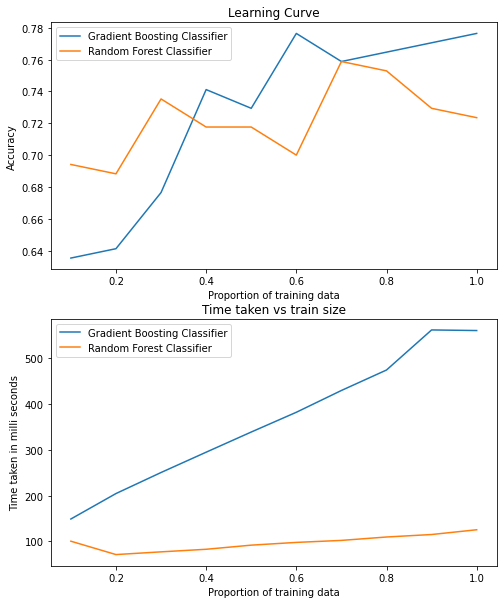

In [376]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

p=np.linspace(0.1,1,10)

#Random Forest Classifier

clf_1 = RandomForestClassifier()
training_time11 = [] 
accuracy11 = []
for i in p:
    if i!=1:
        x_train,a,y_train,b= train_test_split(X_train, Y_train, test_size=1-i)
    else:
        x_train=X_train
        y_train=Y_train
    tic = time.time()
    clf_1.fit(x_train, y_train)
    toc = time.time()
    training_time11.append((toc-tic)*1000)
    y_pred = clf_1.predict(X_test)
    accuracy11.append(accuracy_score(Y_test, y_pred))

# Gradient Bossting Classifier

clf_2 = GradientBoostingClassifier(random_state=0)
training_time12 = [] 
accuracy12 = []
for i in p:
    if i!=1:
        x_train,a,y_train,b= train_test_split(X_train, Y_train, test_size=1-i)
    else:
        x_train=X_train
        y_train=Y_train
    tic = time.time()
    clf_2.fit(x_train, y_train)
    toc = time.time()
    training_time12.append((toc-tic)*1000)
    y_pred = clf_2.predict(X_test)
    accuracy12.append(accuracy_score(Y_test, y_pred))

fig = plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.plot(p,accuracy12,label='Gradient Boosting Classifier')
plt.plot(p,accuracy11,label='Random Forest Classifier')
plt.title('Learning Curve')
plt.xlabel('Proportion of training data')
plt.legend()
plt.ylabel('Accuracy')

plt.subplot(2,1,2)
plt.plot(p,training_time12,label='Gradient Boosting Classifier')
plt.plot(p,training_time11,label='Random Forest Classifier')
plt.title('Time taken vs train size')
plt.xlabel('Proportion of training data')
plt.ylabel('Time taken in milli seconds')
plt.legend()
plt.show()



### Dataset 2

Since random forest classifiers cannot deal with NaN values, I removed all the columns from the dataset containing missing values. i was still left with 62 features to train my model.

### Random Forest and Gradient Boosting Classifier

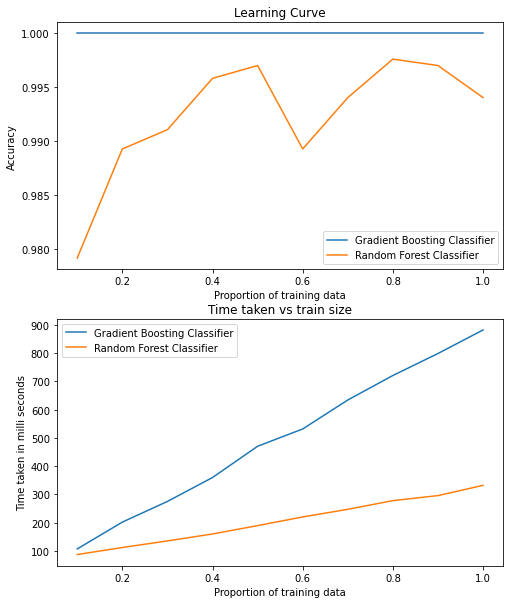

In [374]:
## DATASET 2
from sklearn.preprocessing import OrdinalEncoder #For categorical variables
df=df2.dropna(axis='columns') #Drop NA columns
y = np.array(df['match'])
df = df.drop(columns=['match'])
enc = OrdinalEncoder()
enc.fit(df)
data=enc.transform(df)
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.20)


clf_3 = RandomForestClassifier()
training_time21 = [] 
accuracy21 = []
for i in p:
    if i!=1:
        x_train,a,y_train,b= train_test_split(X_train, Y_train, test_size=1-i)
    else:
        x_train=X_train
        y_train=Y_train
    tic = time.time()
    clf_3.fit(x_train, y_train)
    toc = time.time()
    training_time21.append((toc-tic)*1000)
    y_pred = clf_3.predict(X_test)
    accuracy21.append(accuracy_score(Y_test, y_pred))
    
clf_4 = GradientBoostingClassifier(random_state=0)
training_time22 = [] 
accuracy22 = []
for i in p:
    if i!=1:
        x_train,a,y_train,b= train_test_split(X_train, Y_train, test_size=1-i)
    else:
        x_train=X_train
        y_train=Y_train
    tic = time.time()
    clf_4.fit(x_train, y_train)
    toc = time.time()
    training_time22.append((toc-tic)*1000)
    y_pred = clf_4.predict(X_test)
    accuracy22.append(accuracy_score(Y_test, y_pred))

fig = plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.plot(p,accuracy22,label='Gradient Boosting Classifier')
plt.plot(p,accuracy21,label='Random Forest Classifier')
plt.title('Learning Curve')
plt.xlabel('Proportion of training data')
plt.legend()
plt.ylabel('Accuracy')

plt.subplot(2,1,2)
plt.plot(p,training_time22,label='Gradient Boosting Classifier')
plt.plot(p,training_time21,label='Random Forest Classifier')
plt.title('Time taken vs train size')
plt.xlabel('Proportion of training data')
plt.ylabel('Time taken in milli seconds')
plt.legend()
plt.show()

3) Study the scaling of training time and accuracy of classifiers with training data size using the two
figures generated in part 2 of the question. Compare the performance of classifiers in terms of training
time and accuracy and write 3 main observations. Which gives better accuracy ? Which has shorter
training time ? 

### Answer

It can be seen that as the training size increases, the accuracy rises in three of the above models. The gradient boosting classifier showed no such increase. The training time increases as well when training size is increased. 

1) The Gradient boosting algorithm took longer to fit for both datasets. The accuracy was higher as well. <br>
2) The model took longer to fit for the second dataset. This is probably due to the larger number of training samples.<br> 
3) For gradient boosting in the second dataset, the accuracy remained constant for all training size proportions. An accuracy of 100% was seen. However, the accuracy maybe misleading as the dataset was highly imbalanced

The training time for the random forest was much lesser but the accuracy of gradient boosting was higher.

## Problem 4

1) Does true negative matter for both ROC and PR curve ? Argue why each point on ROC curve
corresponds to a unique point on PR curve ? 

### Answer

True negative matters for the ROC curve as it is necassary to calculate the false positive rate. It does not matter for the PR curve. Because TN is ignored in PR space, one would be concerned that one point could correspond to many confusion matrices. However, given the other three entries in a matrix and a certain number of positive and negative samples, TN can be computed uniquely. The mapping between PR and ROC curve is bijective. Each point on the ROC curve is a unique point of the PR curve 

2) Select one OpenML dataset with 2 output classes. Use two binary classifiers (Adaboost and Logistic
regression) and create ROC and PR curves for each of them. You will have two figures: one containing
two ROC and other containing two PR curves. Show the point where an all positive classifier lies in
the ROC and PR curves. An all positive classifier classifies all the samples as positive.

### Answer

I picked a dataset that encapsulated all the possible tic tac toe configurations to predict a winner

https://www.openml.org/d/50

In [523]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from prg import prg

In [502]:
df3=pd.read_csv('/Users/sarthakbhargava/Downloads/tic_tac_toe.csv')
df3["Class"] = np.where(df3["Class"]=='positive',1,0)

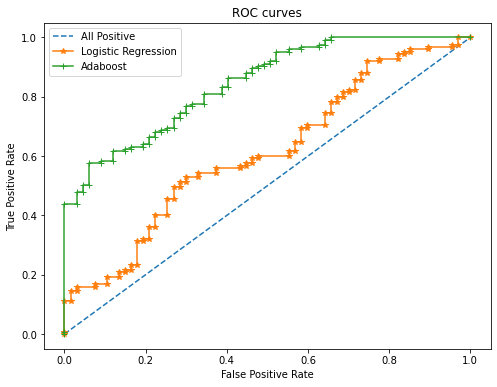

In [545]:
y = np.array(df3['Class'])
df = df3.drop(columns=['Class'])

enc = OrdinalEncoder()
enc.fit(df)
data=enc.transform(df)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.20,stratify=y)
all_pos = [1 for _ in range(len(y_test))]

#Logistic Regression

clf=LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)
preds = probs[:,1]
all_pos_fpr, all_pos_tpr, _ = roc_curve(y_test, all_pos, pos_label = 1)
model_fpr, model_tpr, _ = roc_curve(y_test, preds,pos_label = 1)
model_lr_auc = roc_auc_score(y_test, preds)

#Adaboost

clf2 = AdaBoostClassifier()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
probs2 = clf2.predict_proba(X_test)
preds2 = probs2[:,1]
model_fpr2, model_tpr2, _ = roc_curve(y_test, preds2,pos_label = 1)
model_lr_auc2 = roc_auc_score(y_test, preds2)

plt.figure(figsize=(8,6))
plt.plot(all_pos_fpr, all_pos_tpr, linestyle='--', label='All Positive')
plt.plot(model_fpr, model_tpr, marker='*', label='Logistic Regression')
plt.plot(model_fpr2, model_tpr2, marker='+', label='Adaboost')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curves")
plt.show()


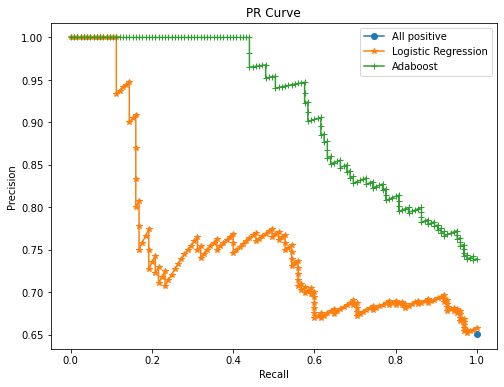

In [546]:
y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)
preds = probs[:,1]

y_pred2 = clf2.predict(X_test)
probs2 = clf2.predict_proba(X_test)
preds2 = probs2[:,1]

model_p, model_r, _ = precision_recall_curve(y_test, preds,pos_label = 1)
model_p2, model_r2, _ = precision_recall_curve(y_test, preds2,pos_label = 1)

all_pos_p = len(y_test[y_test==1])/len(y_test)
plt.figure(figsize=(8,6))
plt.plot([1], [all_pos_p], marker = "o",label='All positive')
plt.plot(model_r, model_p, marker='*',label='Logistic Regression')
plt.plot(model_r2, model_p2, marker='+',label='Adaboost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title("PR Curve")
plt.show()

In ROC curve the all positive classifier lies on the y=x line. At these points all points are classified as positive. In the PR curve the point where recall is 1 refers to an all positive classifier. This refers to (1,0.65) on the curve.

3) NIPS paper defined PR Gain curve. Calculate AUROC (Area under ROC), AUPR (Area under PR),
and AUPRG (Area under PRG) for two classifiers and compare. Do you agree with the conclusion of
NIPS paper that practitioners should use PR gain curves rather than PR curves. 

### Answer

In [418]:
auc_lr = metrics.roc_auc_score(y_test, y_pred)
auc_ad = metrics.roc_auc_score(y_test, y_pred2)
aupr_lr = average_precision_score(y_test, y_pred)
aupr_ad = average_precision_score(y_test, y_pred2)

In [549]:
prg_curve = prg.create_prg_curve(y_test, preds)
prgain_lr=prg.calc_auprg(prg_curve)
prg_curve = prg.create_prg_curve(y_test, preds2)
prgain_ad=prg.calc_auprg(prg_curve)

In [550]:
print('Area under ROC (AUROC)-Logistic Regression: ',auc_lr)
print('Area under ROC (AUROC)-Adaboost: ',auc_ad)
print('Area under PR (AUPR)-Logistic Regression: ',aupr_lr)
print('Area under PR (AUPR)-Adaboost: ',aupr_ad)
print('Area under PRG (AUPRG)-Logistic Regression: ',prgain_lr)
print('Area under PRG (AUPRG)-Adaboost: ',prgain_ad)

Area under ROC (AUROC)-Logistic Regression:  0.598865671641791
Area under ROC (AUROC)-Adaboost:  0.7297313432835821
Area under PR (AUPR)-Logistic Regression:  0.6995059523809524
Area under PR (AUPR)-Adaboost:  0.7765657894736843
Area under PRG (AUPRG)-Logistic Regression:  0.13117407685733198
Area under PRG (AUPRG)-Adaboost:  0.5517460595213454


AdaBoost outperforms Logistic Regression in terms of AUROC, AUPR, and AUPRG, making it a stronger classifier for this job and dataset.
PRG curves appear to be superior to PR curves because AUPR has no meaningful interpretation, whereas Area under PRG curves gives us the model's FG1 score, which can be used to derive the F1 score.